# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Customers Segmentation Project (Unsupervised Project)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you'd like to be the first to know about updates, please don't forget to follow us!</b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Introduction

**Customer Segmentation and Clustering Algorithms in Unsupervised Learning**

- First of all, Unsupervised Learning refers to the effort to make observation units meaningful in situations where there is no dependent variable in machine learning models.

- The goal in unsupervised learning is to discover patterns or relationships in the data.

- From this perspective, unsupervised learning is often used for Exploratory Data Analysis (EDA) and can be used to identify patterns or relationships that may not be immediately noticeable when looking at raw data.

- The data we will be working on today contains purchase history data obtained from membership cards given to customers of a large shopping center, and it is desired to segment this data based on these records.

- The data has been previously processed, feature engineered, and is ready for use.

- Using this data, we will divide our customers into clusters or groups using different methods and analyze these groups to derive insights.

- Before that, we will perform EDA to understand and familiarize ourselves with the data, which will help us to perform more accurate clustering.

**1. Introduction:**

- **Domain Knowledge:**
   - In the modern retail world, customer data is invaluable. Shopping malls analyze customer habits, preferences, and demographic information to offer more personalized experiences. Such personalization can enhance customer loyalty and drive sales.

- **Dataset Introduction:**
   - The "Mall_Customers" dataset contains valuable information about shopping mall customers, collected to support this goal. This dataset includes basic demographic and economic information such as customers' age, gender, annual income, and spending.

- **Importance of the Dataset:**
   - Customer segmentation is a critical tool for tailoring marketing strategies and campaigns to individuals. The "Mall_Customers" dataset provides a foundation for this segmentation, offering valuable insights to retailers and marketers.

- **Objective of Our Project:**
   - In this project, we aim to perform customer segmentation using unsupervised learning techniques with the "Mall_Customers" dataset. This segmentation will provide in-depth insights into customer behavior at the shopping mall, offering opportunities to deliver more personalized services.

**2. Features of the Dataset:**
   - **Customer ID:** A unique identifier assigned to each customer.
   - **Gender:** The gender of the customer.

# Tasks

**1. Import Libraries**
- Import Libraries

**2. Exploratory Data Analysis (EDA)**

**3. Cluster Analysis with K-Means**

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
**4. Hierarchical Clustering**

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

**5.Conclusion**

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [30]:
data = pd.read_csv('Mall_Customers.csv')
customer_data = data.copy()
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
customer_data.columns = ['customerid', 'gender', 'age', 'annual_income',
       'spending_score']

In [32]:
customer_data.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis (EDA)

In [33]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
customer_data.isnull().sum()

customerid        0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

<b>Univariate Analysis:</b> I will analyze the distributions of 'age', 'annual_income', and 'spending_score'.

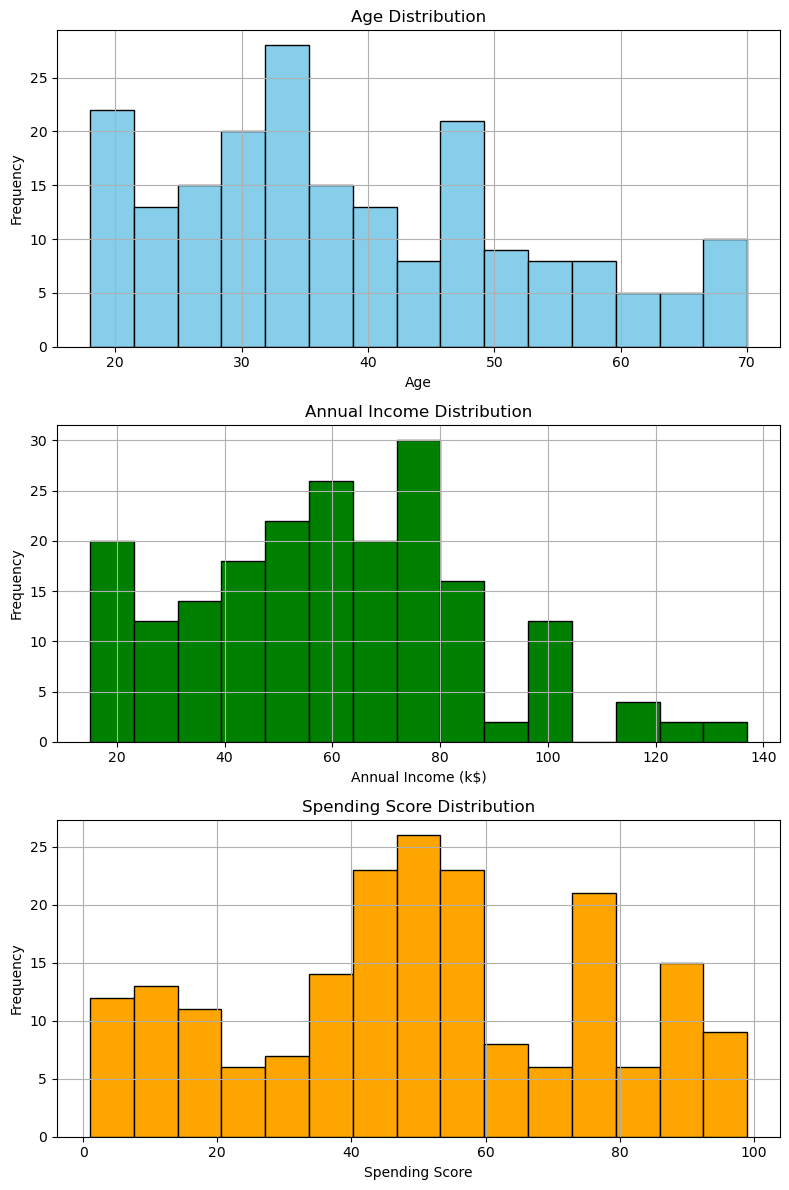

In [10]:
# Plot histograms for 'age', 'annual_income', and 'spending_score'
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

customer_data['age'].hist(ax=axs[0], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

customer_data['annual_income'].hist(ax=axs[1], bins=15, color='green', edgecolor='black')
axs[1].set_title('Annual Income Distribution')
axs[1].set_xlabel('Annual Income (k$)')
axs[1].set_ylabel('Frequency')

customer_data['spending_score'].hist(ax=axs[2], bins=15, color='orange', edgecolor='black')
axs[2].set_title('Spending Score Distribution')
axs[2].set_xlabel('Spending Score')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms provide the following insights:

* Age Distribution: The ages of the customers are spread across a wide range, with a noticeable concentration around younger ages.
* Annual Income Distribution: Annual income appears to be a bit left skewed, with the majority of customers earning between 15k and 90k.
* Spending Score Distribution: Spending scores show a broad spread, suggesting that customers have varying levels of engagement or expenditure at the shopping mall.

<b>Bivariate Analysis:</b> I will examine relationships between the variables, starting with correlations between continuous variables and some visualizations.

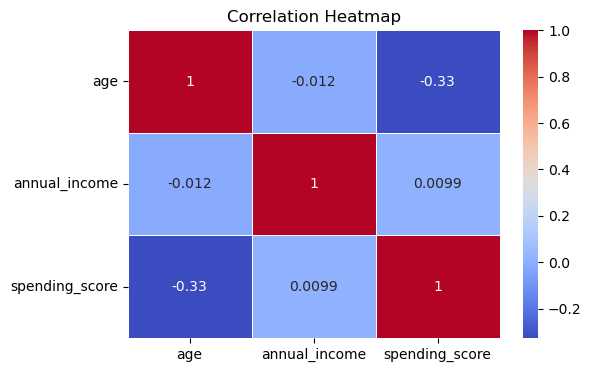

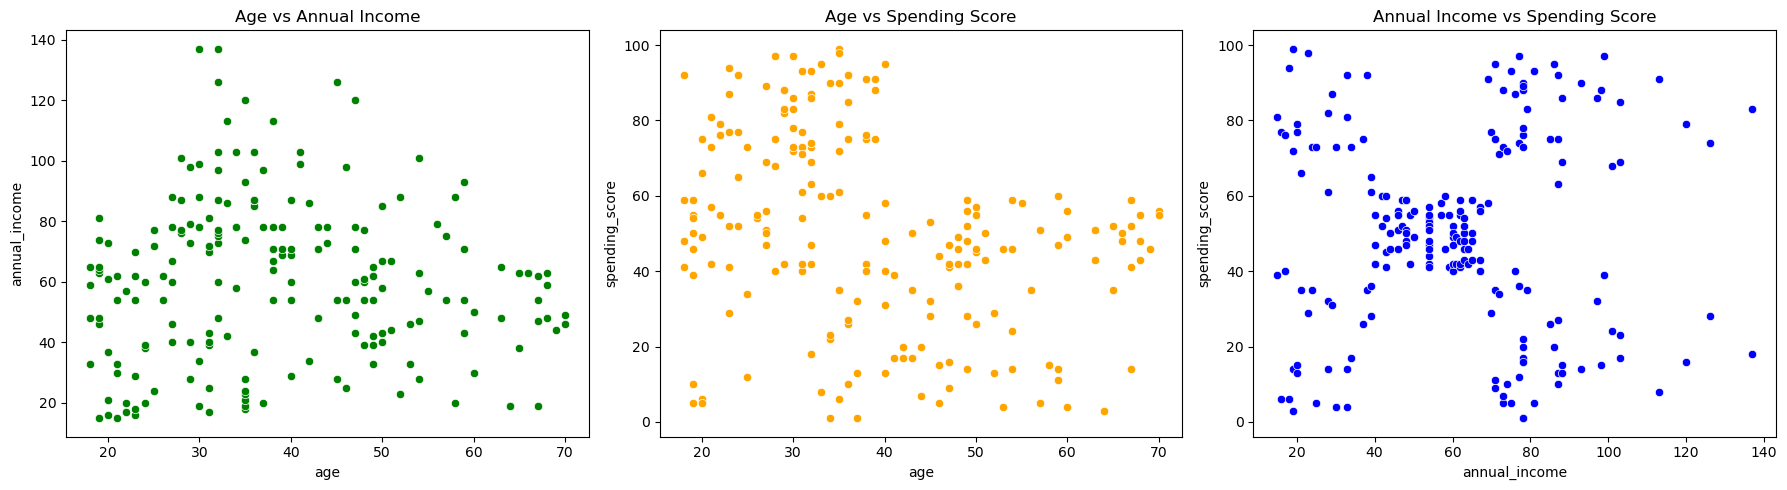

In [11]:
# Calculate correlation matrix for continuous variables
corr_matrix = customer_data[['age', 'annual_income', 'spending_score']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for pairs of continuous variables
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='age', y='annual_income', data=customer_data, ax=axs[0], color='green')
axs[0].set_title('Age vs Annual Income')

sns.scatterplot(x='age', y='spending_score', data=customer_data, ax=axs[1], color='orange')
axs[1].set_title('Age vs Spending Score')

sns.scatterplot(x='annual_income', y='spending_score', data=customer_data, ax=axs[2], color='blue')
axs[2].set_title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()


The bivariate analysis reveals the following:

* Correlation Heatmap: There is almost no correlation between the variables 'age', 'annual_income', and 'spending_score', indicating that these variables are fairly independent in this dataset.

Scatter Plots:

* Age vs Annual Income: There's no clear pattern or relationship between age and income.
* Age vs Spending Score: The spending score appears to vary widely across all age groups.
* Annual Income vs Spending Score: Similarly, spending scores vary for different income levels, showing no strong relationship.


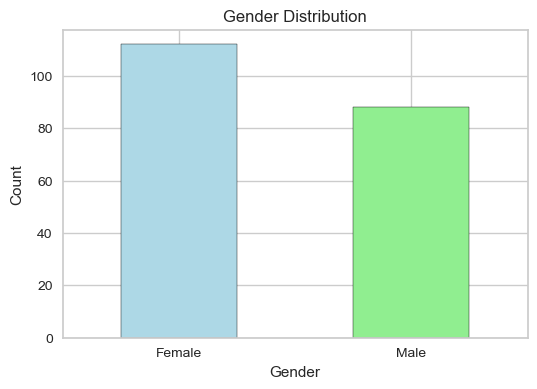

In [35]:
# Analyzing gender distribution and breakdown in relation to other variables

# Gender distribution
gender_distribution = customer_data['gender'].value_counts()

# Plotting gender distribution
plt.figure(figsize=(6,4))
gender_distribution.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



In [36]:

# Grouping by gender to analyze the mean of other variables
gender_analysis = customer_data.groupby('gender').mean()[['age', 'annual_income', 'spending_score']]

gender_analysis

,age,annual_income,spending_score
gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


Gender-Based Breakdown
* Gender Distribution: The gender distribution is fairly balanced between males and females.
* Average Age: Males have a slightly higher average age (39.8) compared to females (38.1).
* Average Annual Income: Males tend to have a slightly higher average annual income (62.2k) compared to females (59.3k).
* Average Spending Score: Females have a higher average spending score (51.5) compared to males (48.5).

 """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    

In [45]:
customer_data

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Cluster Analysis

## Age and Spending Score - X1

In [46]:
# Create a new dataset with 'age' and 'spending_score'
age_spending_data = customer_data[['age', 'spending_score']]

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [48]:
hopkins(age_spending_data)

0.7674253902477642

That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.

If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.

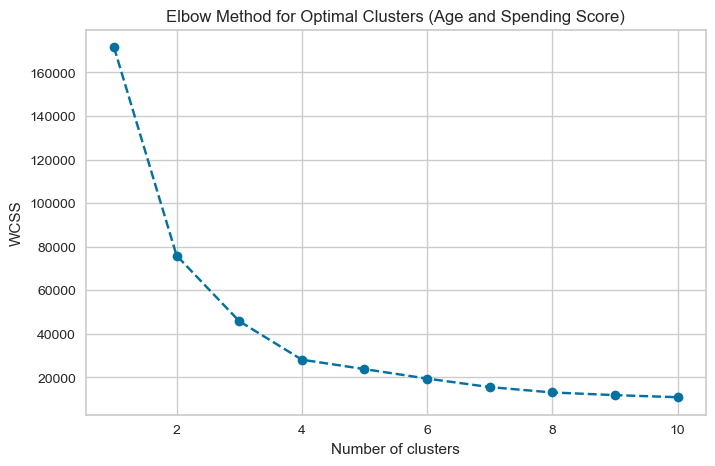

In [11]:


# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=42)
    kmeans.fit(age_spending_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters (Age and Spending Score)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The Elbow Method graph indicates that the optimal number of clusters for the Age and Spending Score dataset could be around 4 or 5 clusters, where the "elbow" point occurs.

Next, I'll apply K-Means clustering with 5 clusters and visualize the results.

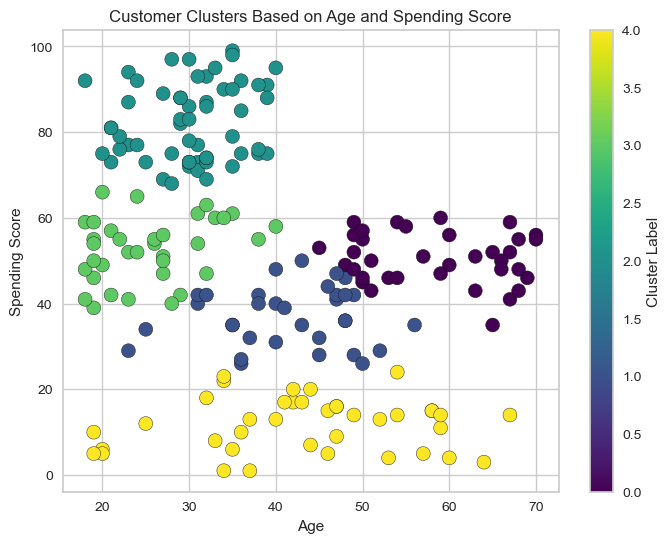

In [15]:
# Apply K-Means with 5 clusters
kmeans_age_spending = KMeans(n_clusters=5, n_init='auto', init='k-means++', random_state=42)
customer_data['age_spending_cluster'] = kmeans_age_spending.fit_predict(age_spending_data)

# Step Visualizing and labeling the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['age'], customer_data['spending_score'], 
            c=customer_data['age_spending_cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title('Customer Clusters Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()


Let's apply YellowBricks visualization

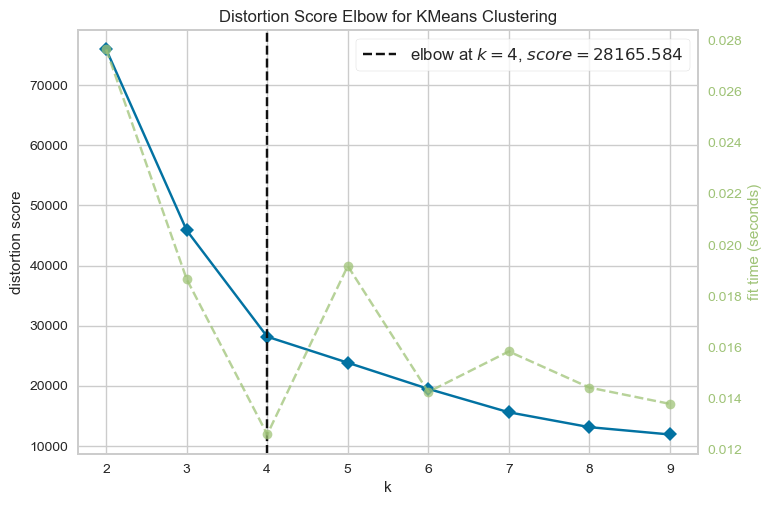

In [14]:
from yellowbrick.cluster import KElbowVisualizer   # Uses Yellowbrick to visualize the elbow point in the graph

model_ = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))  # Evaluates the model for each cluster count between 2 and 10

visualizer.fit(age_spending_data)        # Fit the data to the visualizer.. Shows according to the inertia method
visualizer.show();


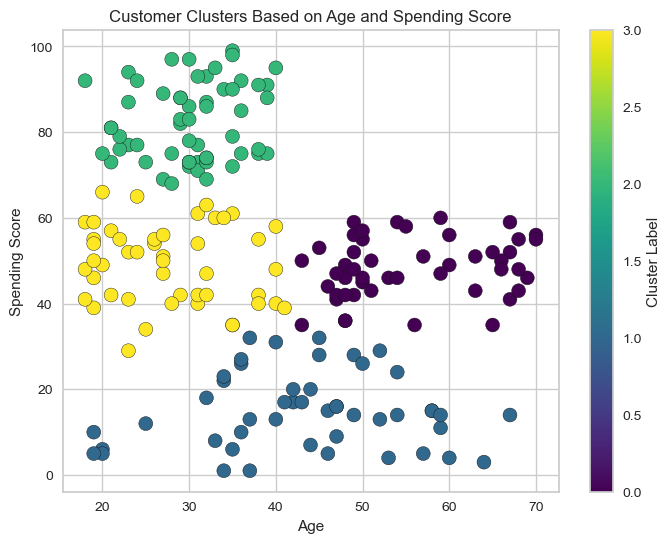

In [16]:
# Apply K-Means with 4 clusters
kmeans_age_spending = KMeans(n_clusters=4, n_init='auto', init='k-means++', random_state=42)
customer_data['age_spending_cluster'] = kmeans_age_spending.fit_predict(age_spending_data)

# Step Visualizing and labeling the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['age'], customer_data['spending_score'], 
            c=customer_data['age_spending_cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title('Customer Clusters Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()

## Annual Income and Spending Score - X2

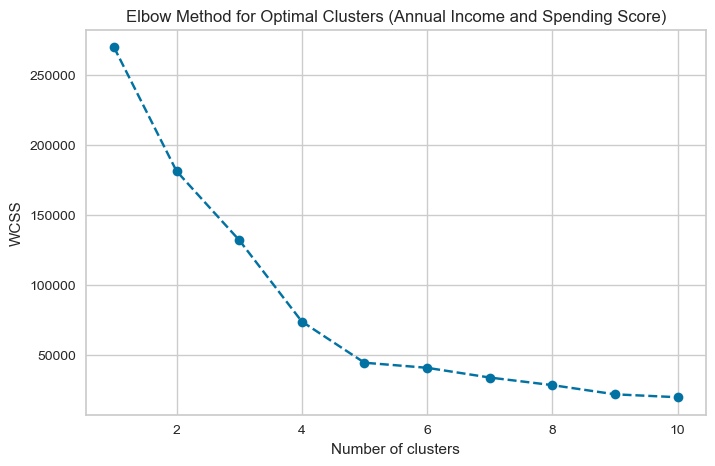

In [17]:
# Create a new dataset with 'annual_income' and 'spending_score'
income_spending_data = customer_data[['annual_income', 'spending_score']]

# Determine optimal number of clusters using the Elbow Method
wcss_income_spending = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init ='auto', init='k-means++', random_state=42)
    kmeans.fit(income_spending_data)
    wcss_income_spending.append(kmeans.inertia_)

# Plotting the Elbow Method graph for 'annual_income' and 'spending_score'
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_income_spending, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters (Annual Income and Spending Score)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The Elbow Method for the Annual Income and Spending Score dataset suggests that the optimal number of clusters is likely around 5, where the elbow point occurs.

Next, I'll apply K-Means clustering with 5 clusters and visualize the results.

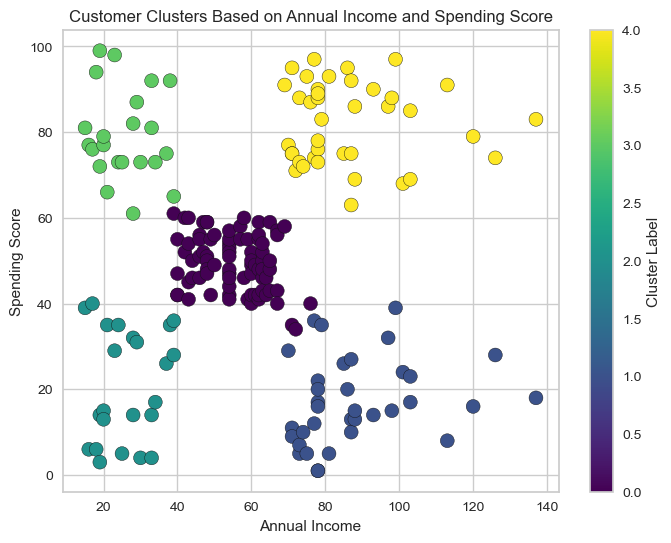

In [18]:
# Apply K-Means with 5 clusters for 'annual_income' and 'spending_score'
kmeans_income_spending = KMeans(n_clusters=5, n_init='auto', init='k-means++', random_state=42)
customer_data['income_spending_cluster'] = kmeans_income_spending.fit_predict(income_spending_data)

# Visualizing and labeling the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['annual_income'], customer_data['spending_score'], 
            c=customer_data['income_spending_cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title('Customer Clusters Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()


The visualization shows the clusters based on Annual Income and Spending Score, where the customers are grouped into 5 distinct clusters.

Let's apply YelloBricks vusualization

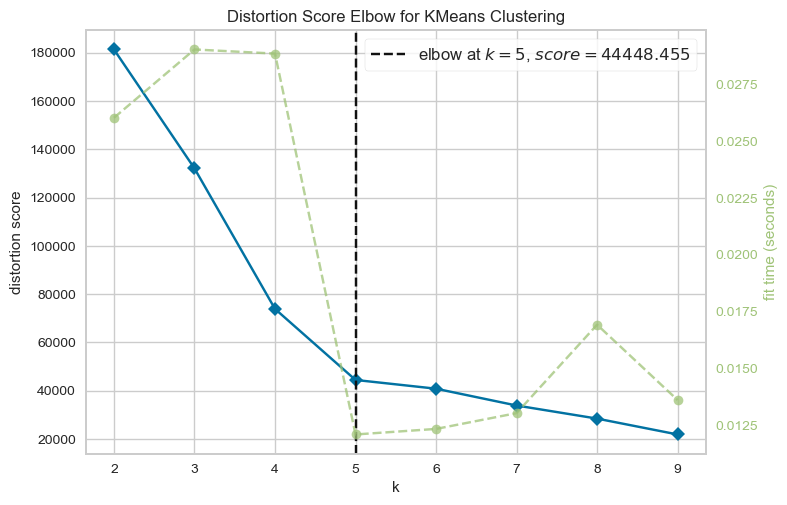

In [19]:
from yellowbrick.cluster import KElbowVisualizer   # Uses Yellowbrick to visualize the elbow point in the graph

model_ = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))  # Evaluates the model for each cluster count between 2 and 10

visualizer.fit(income_spending_data)        # Fit the data to the visualizer.. Shows according to the inertia method
visualizer.show();

YellowBrick visualization  also suggests the clusters based on Annual Income and Spending Score, where the customers are grouped into 5 distinct clusters.

Let's analyze the Silhouette Scores to assess the quality of the clustering

In [28]:
# Silhouette score for Age and Spending Score clusters
silhouette_age_spending = silhouette_score(age_spending_data, customer_data['age_spending_cluster'])

# Silhouette score for Annual Income and Spending Score clusters
silhouette_income_spending = silhouette_score(income_spending_data, customer_data['income_spending_cluster'])

print('Age and Spending Score:', silhouette_age_spending)
print('Annual Income and Spending Score:', silhouette_income_spending)


Age and Spending Score: 0.49973941540141753
Annual Income and Spending Score: 0.553931997444648


Silhouette Visualizer

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

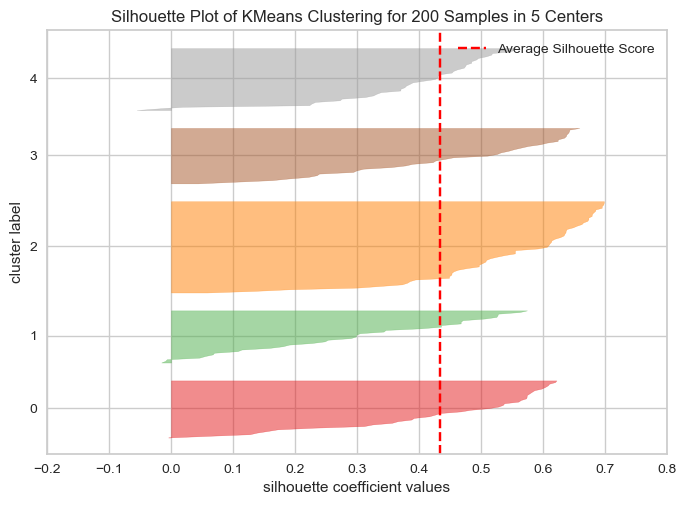

In [20]:
# Silhouette Visualizer for Age and Spending Score data using 5 clusters
model_age_spend = KMeans(5, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model_age_spend)

visualizer.fit(age_spending_data)    # Fit the data to the visualizer
visualizer.poof();

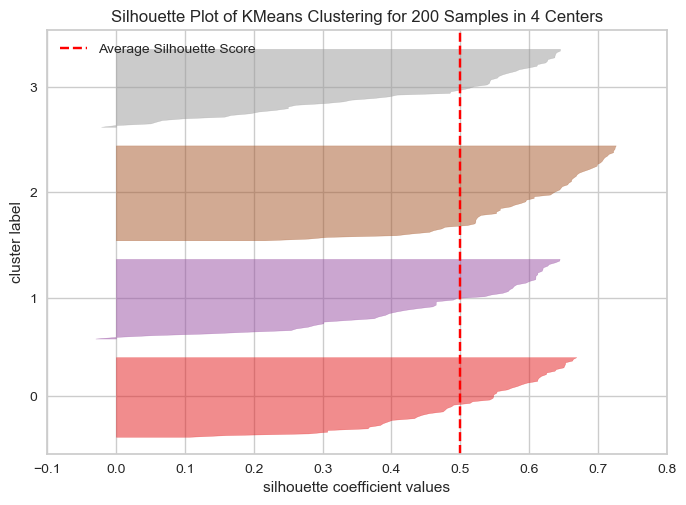

In [21]:
# Silhouette Visualizer for Age and Spending Score data using 4 clusters
model_age_spend = KMeans(4, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model_age_spend)

visualizer.fit(age_spending_data)    # Fit the data to the visualizer
visualizer.poof();

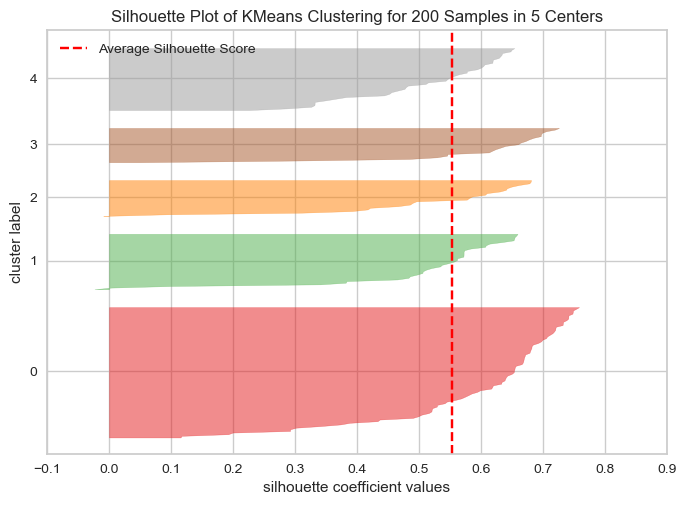

In [22]:
# Silhouette Visualizer for Income and Spending Score data using 5 clusters
model_income_spend = KMeans(5, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(model_income_spend)

visualizer.fit(income_spending_data)    # Fit the data to the visualizer
visualizer.poof();

Both scores are positive, indicating that the clusters are reasonably well-separated. The clustering based on <b>Annual Income and Spending Score</b> shows a better separation between clusters compared to <b>Age and Spending Score</b>, as indicated by the higher silhouette score.

In [23]:
# Comparing the sizes of the clusters for both scenarios

# Age and Spending Score cluster sizes
age_spending_cluster_sizes = customer_data['age_spending_cluster'].value_counts()

# Annual Income and Spending Score cluster sizes
income_spending_cluster_sizes = customer_data['income_spending_cluster'].value_counts()

age_spending_cluster_sizes, income_spending_cluster_sizes


(age_spending_cluster
 2    57
 1    48
 0    48
 3    47
 Name: count, dtype: int64,
 income_spending_cluster
 0    81
 4    39
 1    35
 2    23
 3    22
 Name: count, dtype: int64)

The Annual Income and Spending Score clustering shows more variation in cluster sizes, with one significantly larger cluster (Cluster 0 with 81 customers). In contrast, the Age and Spending Score clustering has a more balanced distribution across clusters.

# Hierarchical Clustering

We'll proceed with the following steps for hierarchical clustering:

* Determine the optimal number of clusters using a Dendrogram: A dendrogram helps visualize the hierarchy and assists in selecting the appropriate number of clusters.

* Apply Agglomerative Clustering: Once the number of clusters is determined, we'll apply agglomerative clustering.

* Visualize and Label the Clusters: Finally, we will visualize the clusters and label them accordingly.

## Age and Spending Score- X1

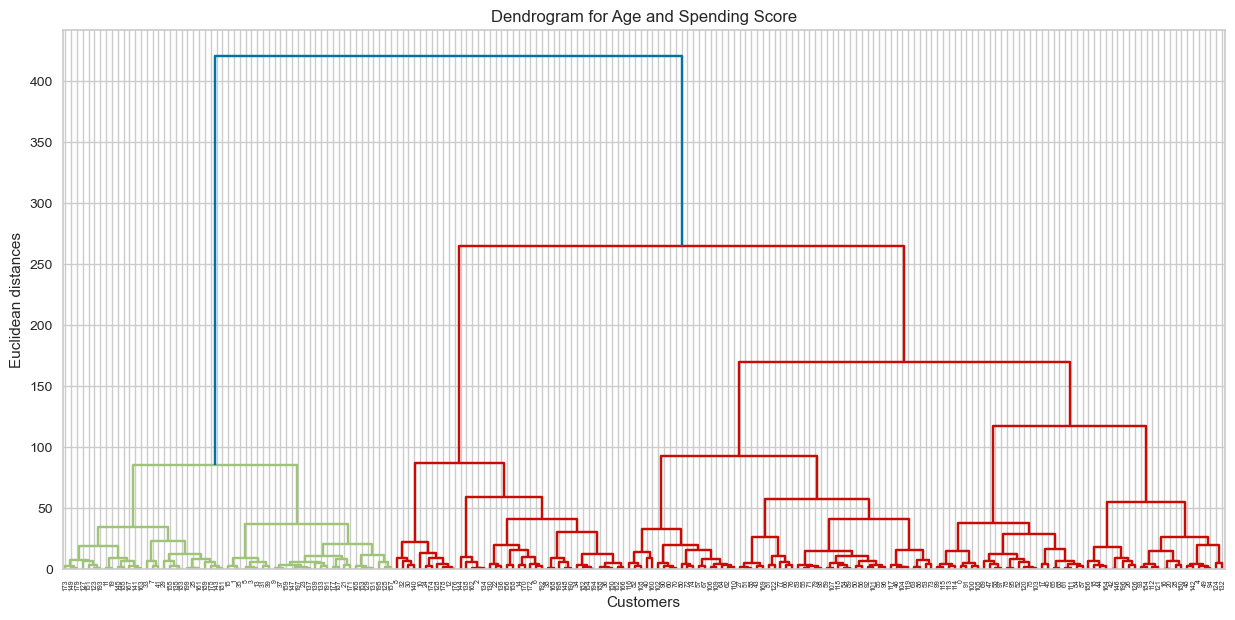

In [24]:
# Create a linkage matrix for hierarchical clustering (Age and Spending Score)
linkage_matrix_age_spending = linkage(age_spending_data, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix_age_spending)
plt.title('Dendrogram for Age and Spending Score')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


The dendrogram for Age and Spending Score suggests that an optimal number of clusters could be around 4 or 5, where the largest vertical distance without crossing horizontal lines appears.

## Annual Income and Spending Score- X2

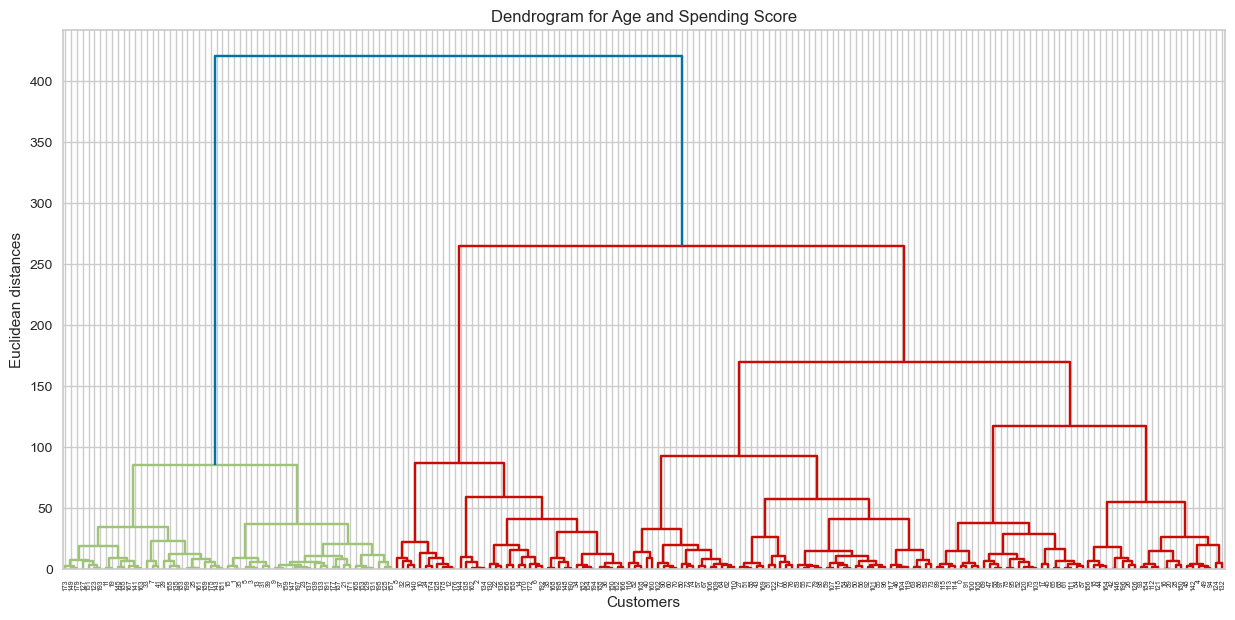

In [25]:
# Create a linkage matrix for hierarchical clustering (Age and Spending Score)
linkage_matrix_age_spending = linkage(age_spending_data, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix_age_spending)
plt.title('Dendrogram for Age and Spending Score')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


The dendrogram for Annual Income and Spending Score also suggests around 4 or 5 clusters, where the longest vertical distances exist without crossing horizontal lines.

Now that we've identified the optimal number of clusters (around 4 or 5), I'll proceed by applying Agglomerative Clustering with 5 clusters for both datasets

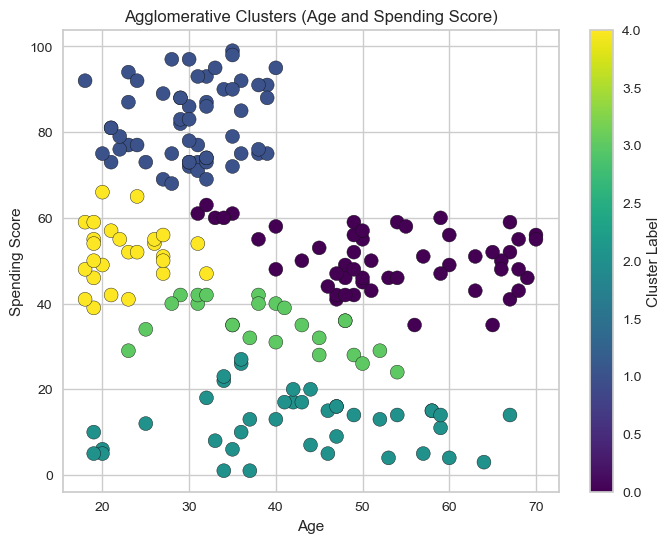

In [26]:
# Apply Agglomerative Clustering with 5 clusters for Age and Spending Score
agg_clustering_age_spending = AgglomerativeClustering(n_clusters=5)
customer_data['agg_age_spending_cluster'] = agg_clustering_age_spending.fit_predict(age_spending_data)

# Visualizing and labeling the clusters for Age and Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['age'], customer_data['spending_score'], 
            c=customer_data['agg_age_spending_cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title('Agglomerative Clusters (Age and Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()


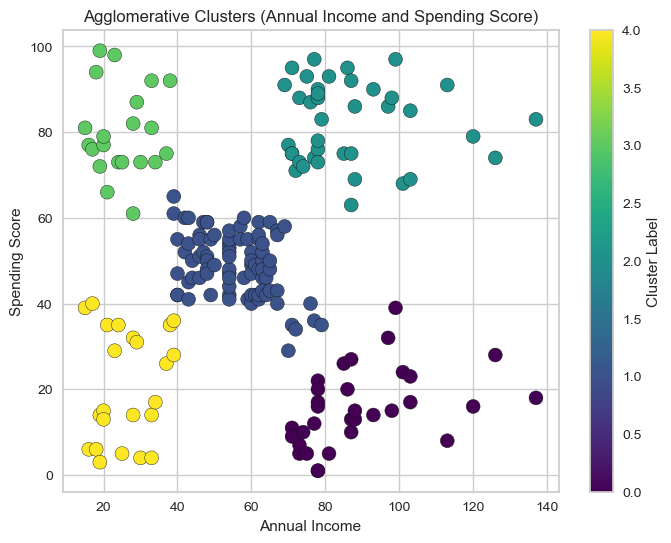

In [27]:
# Apply Agglomerative Clustering with 5 clusters for Annual Income and Spending Score
agg_clustering_income_spending = AgglomerativeClustering(n_clusters=5)
customer_data['agg_income_spending_cluster'] = agg_clustering_income_spending.fit_predict(income_spending_data)

# Visualizing and labeling the clusters for Annual Income and Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['annual_income'], customer_data['spending_score'], 
            c=customer_data['agg_income_spending_cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title('Agglomerative Clusters (Annual Income and Spending Score)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()


# Conclusion

# Key Observations from K-Means and Hierarchical Clustering

## 1. K-Means Clustering

### Clustering Based on Age and Spending Score
- K-Means grouped the customers into **5 clusters**.
- Clusters did not show strong patterns in terms of age distribution.
- The **silhouette score** for this clustering was moderate at **0.4335** (0.49 for 4 clusters), indicating that clusters are somewhat distinguishable but not strongly separated.
  
### Clustering Based on Annual Income and Spending Score
- Clusters based on **annual income** and **spending score** were more distinct, with a higher **silhouette score** of **0.5539**.
- A clearer relationship between **income** and **spending habits** emerged, suggesting income has a stronger influence on customer segmentation than age.
  
## 2. Hierarchical (Agglomerative) Clustering

### Clustering Based on Age and Spending Score
- Agglomerative clustering also produced **5 clusters** similar to K-Means.
- The dendrogram did not reveal highly distinct clusters, similar to the result from K-Means, confirming that age is not a strong factor in spending behavior.

### Clustering Based on Annual Income and Spending Score
- **5 clusters** were found, aligning well with K-Means results.
- The dendrogram provided a hierarchical view of how clusters relate, with distinct branches indicating clearer cluster separations based on income.

## 3. Overall Conclusions

- **Importance of Annual Income**: Both K-Means and Hierarchical Clustering show that **annual income** and **spending score** form more distinct and cohesive clusters than age.
  
- **Cluster Stability**: Results from both methods are consistent, particularly for **Annual Income and Spending Score**, showing stable and meaningful clusters.
  
- **Usefulness of Methods**: 
  - **K-Means** is faster and scalable for large datasets.
  - **Hierarchical Clustering** offers more insight into how clusters form hierarchically (useful for understanding relationships between groups).

## 4. Recommendations

- **Customer Segmentation**: Focus on clusters formed by **Annual Income and Spending Score** for meaningful customer segmentation.
  
- **Income-Based Targeting**: Target different **income groups** with tailored marketing strategies, as income appears to influence spending behavior more than age.

- **Further Analysis**: Consider analyzing additional variables like **customer behavior data** or applying **dimensionality reduction techniques** (e.g., PCA) to refine the clusters.


# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Thanks, Hoping it will be helpful</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you'd like to be the first to know about updates, please don't forget to follow us!</b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |